In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sb
import kagglehub
import os

c:\Users\Aluno\Desktop\Atividades\bi\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = kagglehub.dataset_download("sijovm/used-cars-data-from-ebay-kleinanzeigen")
df = pd.read_csv(os.path.join(path, "autos.csv"), encoding='latin-1')
print("Primeiros 5 registros:\n", df.head())

Primeiros 5 registros:
            dateCrawled                            name  seller offerType  \
0  2016-03-24 11:52:17                      Golf_3_1.6  privat   Angebot   
1  2016-03-24 10:58:45            A5_Sportback_2.7_Tdi  privat   Angebot   
2  2016-03-14 12:52:21  Jeep_Grand_Cherokee_"Overland"  privat   Angebot   
3  2016-03-17 16:54:04              GOLF_4_1_4__3TÜRER  privat   Angebot   
4  2016-03-31 17:25:20  Skoda_Fabia_1.4_TDI_PD_Classic  privat   Angebot   

   price abtest vehicleType  yearOfRegistration    gearbox  powerPS  model  \
0    480   test         NaN                1993    manuell        0   golf   
1  18300   test       coupe                2011    manuell      190    NaN   
2   9800   test         suv                2004  automatik      163  grand   
3   1500   test  kleinwagen                2001    manuell       75   golf   
4   3600   test  kleinwagen                2008    manuell       69  fabia   

   kilometer  monthOfRegistration fuelType       b

1 – Mostre como está a distribuição de Veículos com base no Ano de Registro. Para isso
crie um Plot com a Distribuição de Veículos com base no Ano de Registro

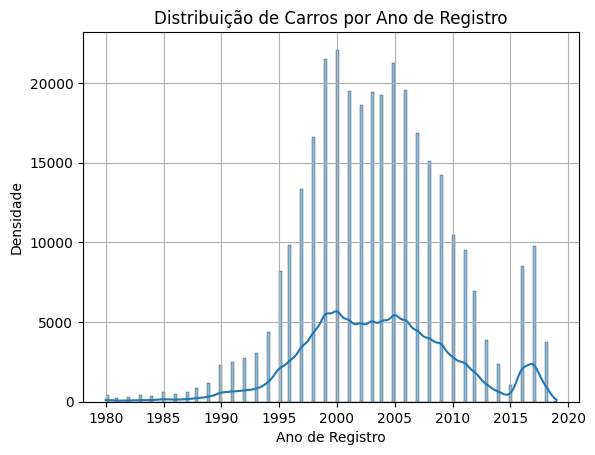

In [3]:
#Remoção de outliers
df = df[df['yearOfRegistration'].between(1980,2023)]
df = df[df['price'].between(df['price'].quantile(0.05), df['price'].quantile(0.95))]

sb.histplot(df['yearOfRegistration'], kde=True)
plt.title('Distribuição de Carros por Ano de Registro')
plt.xlabel('Ano de Registro')
plt.ylabel('Densidade')
plt.grid()
plt.show()

2 – Verifique a variação da faixa de preço pelo tipo de veículo, para isso crie um Boxplot
para avaliar os outliers.

C:\Users\Aluno\AppData\Local\Temp\ipykernel_21304\3362321504.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='vehicleType', y='price', data=df, palette='Set2')


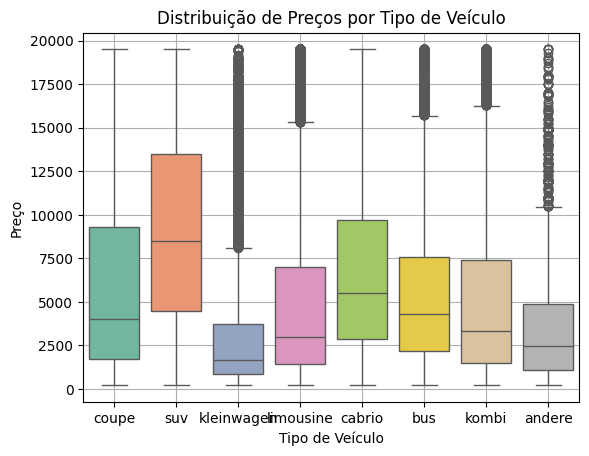

In [4]:
sb.boxplot(x='vehicleType', y='price', data=df, palette='Set2')
plt.title('Distribuição de Preços por Tipo de Veículo')
plt.xlabel('Tipo de Veículo')
plt.ylabel('Preço')
plt.grid()
plt.show()

3 – Realize uma contagem total de veículos à venda conforme o tipo de veículo. Para isso
crie um Count Plot que mostre o número de veículos pertencentes a cada categoria.

C:\Users\Aluno\AppData\Local\Temp\ipykernel_21304\2774920283.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='vehicleType', data=df, palette='rocket_r')


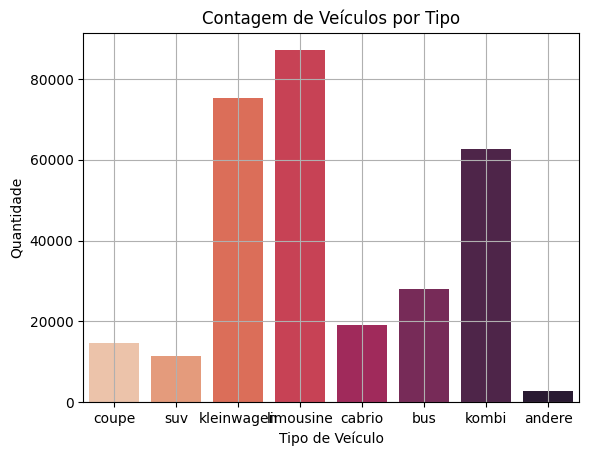

In [5]:
sb.color_palette("flare", as_cmap=True)
sb.countplot(x='vehicleType', data=df, palette='rocket_r')
plt.title('Contagem de Veículos por Tipo')
plt.xlabel('Tipo de Veículo')
plt.ylabel('Quantidade')
plt.grid()
plt.show()

4 – Realize uma contagem do número de veículos de cada marca e crie um um Plot que
mostre esse número de veículos pertencentes a cada marca.

C:\Users\Aluno\AppData\Local\Temp\ipykernel_21304\1005666225.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(y='brand', data=df, palette='rocket_r', orient='h')


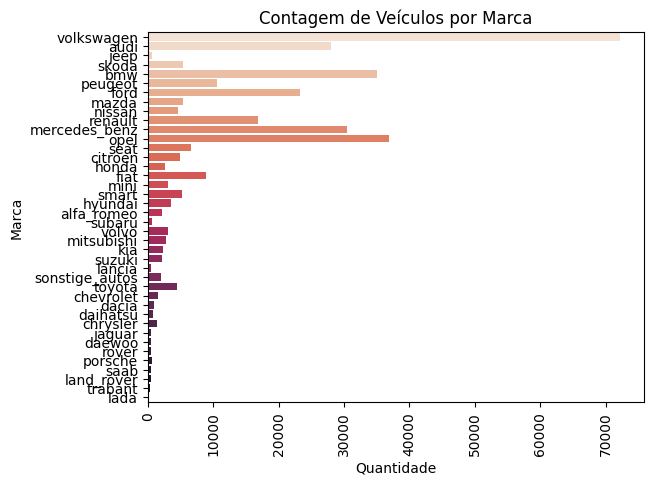

In [6]:
sb.countplot(y='brand', data=df, palette='rocket_r', orient='h')
plt.title('Contagem de Veículos por Marca')
plt.ylabel('Marca')
plt.xlabel('Quantidade')
plt.xticks(rotation=90)
plt.show()

5 – Calcule o preço médio dos veículos com base no tipo de veículo, bem como no tipo
de caixa de câmbio e crie um Plot com o Preço médio dos veículos com base no tipo de
veículo, bem como no tipo de caixa de câmbio

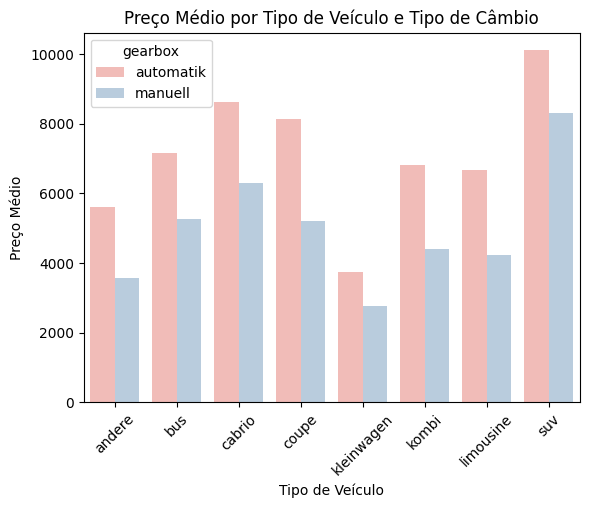

In [7]:
mean_price = df.groupby(['vehicleType', 'gearbox'])['price'].mean().reset_index()

sb.barplot(x='vehicleType', y='price', hue='gearbox', data=mean_price, palette='Pastel1')

plt.title('Preço Médio por Tipo de Veículo e Tipo de Câmbio')
plt.xlabel('Tipo de Veículo')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)
plt.show()

6 – Crie um Barplot com o preço médio do veículo por tipo de veículo e tipo de vendedor.

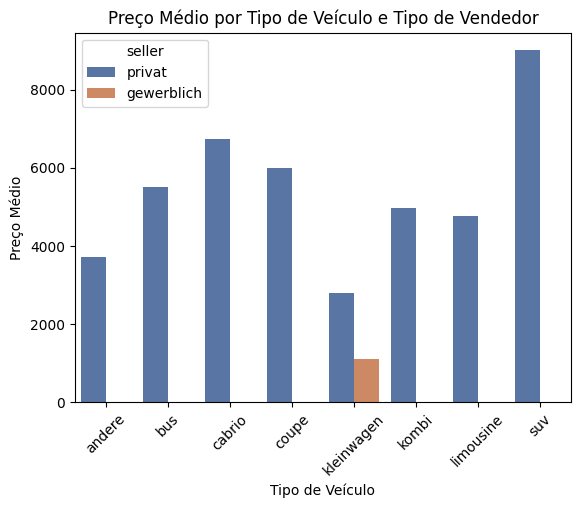

In [8]:
mean_price = df.groupby(['vehicleType', 'seller'])['price'].mean().reset_index()

sb.barplot(x='vehicleType', y='price', hue='seller', data=mean_price, palette='deep')

plt.title('Preço Médio por Tipo de Veículo e Tipo de Vendedor')
plt.xlabel('Tipo de Veículo')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)
plt.show()

7 – Crie um Barplot com a Potência média de um veículo por tipo de veículo e tipo de
caixa de câmbio

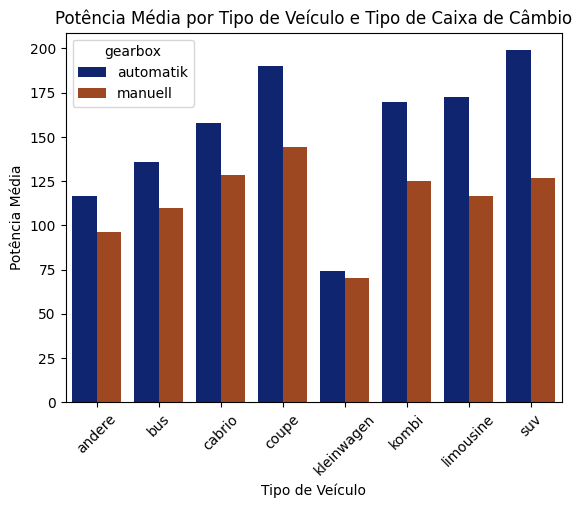

In [9]:
mean_price = df.groupby(['vehicleType', 'gearbox'])['powerPS'].mean().reset_index()

sb.barplot(x='vehicleType', y='powerPS', hue='gearbox', data=mean_price, palette='dark')

plt.title('Potência Média por Tipo de Veículo e Tipo de Caixa de Câmbio')
plt.xlabel('Tipo de Veículo')
plt.ylabel('Potência Média')
plt.xticks(rotation=45)
plt.show()

8 – Calcule e mostre uma tabela com a média de preço por marca e por veículo.
Dica: crie dois laços for.

In [10]:
tabela_media_preco = df.groupby(['brand', 'vehicleType'])['price'].mean().reset_index()
print(tabela_media_preco)

          brand vehicleType         price
0    alfa_romeo      andere   2318.090909
1    alfa_romeo      cabrio   6739.341463
2    alfa_romeo       coupe   4788.830986
3    alfa_romeo  kleinwagen   4610.740260
4    alfa_romeo       kombi   3667.627803
..          ...         ...           ...
288       volvo       coupe   5033.240741
289       volvo  kleinwagen   4339.833333
290       volvo       kombi   3306.349448
291       volvo   limousine   4533.584027
292       volvo         suv  11860.864486

[293 rows x 3 columns]


9 – Crie um Heatmap com Preço médio de um veículo por marca, bem como tipo de
veículo.

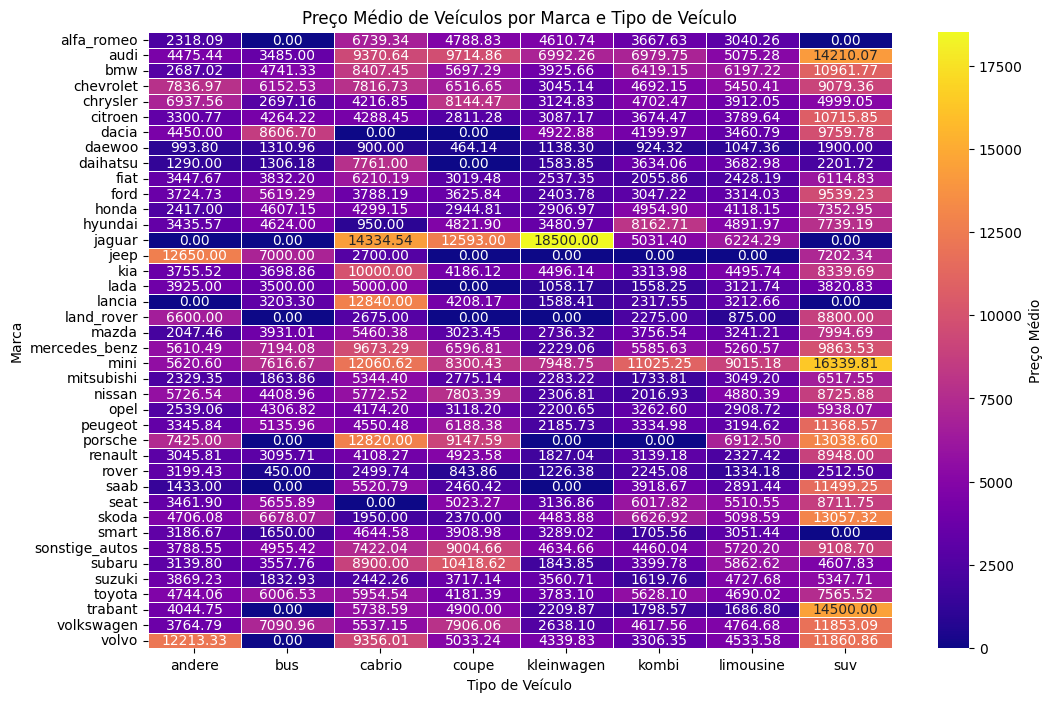

In [11]:
tabela_media_preco = df.groupby(['brand', 'vehicleType'])['price'].mean().reset_index()

pivot_table = tabela_media_preco.pivot(index='brand', columns='vehicleType', values='price')
pivot_table = pivot_table.fillna(0)

plt.figure(figsize=(12, 8))
sb.heatmap(pivot_table, annot=True, cmap='plasma', fmt='.2f', cbar_kws={'label': 'Preço Médio'}, linewidths=0.5)

plt.title('Preço Médio de Veículos por Marca e Tipo de Veículo')
plt.xlabel('Tipo de Veículo')
plt.ylabel('Marca')

plt.show()